In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset
data = pd.read_csv('flood.csv')

# Assuming 'FloodProbability' is the target
X = data.drop('FloodProbability', axis=1)
y = data['FloodProbability']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
def evaluate_model(model, model_name):
    results = {}
    
    # 1. Measure Training Time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # 2. Measure Prediction Time
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    
    # 3. Compute Metrics
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, y_pred)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, y_pred)
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, y_pred)

    # Cross-Validation Score (5-Fold)
    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_mse = -cv_scores.mean()

    # Store Results
    results['Model'] = model_name
    results['Training MSE'] = train_mse
    results['Testing MSE'] = test_mse
    results['Training R²'] = train_r2
    results['Testing R²'] = test_r2
    results['Training MAE'] = train_mae
    results['Testing MAE'] = test_mae
    results['Training Time'] = train_time
    results['Prediction Time'] = pred_time
    results['Cross-Validation MSE'] = cv_mse

    return results


In [4]:
# Initialize Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Evaluate Models
rf_results = evaluate_model(rf_model, 'Random Forest')
gb_results = evaluate_model(gb_model, 'Gradient Boosting')
svr_results = evaluate_model(svr_model, 'Support Vector Regression')

# Compile all results into a DataFrame
results_df = pd.DataFrame([rf_results, gb_results, svr_results])
print(results_df)


                       Model  Training MSE  Testing MSE  Training R²  \
0              Random Forest      0.000095     0.000673     0.961934   
1          Gradient Boosting      0.000494     0.000551     0.803073   
2  Support Vector Regression      0.002312     0.002479     0.077402   

   Testing R²  Training MAE  Testing MAE  Training Time  Prediction Time  \
0    0.729682      0.007628     0.020485      31.274778         0.359399   
1    0.778957      0.017564     0.018481       7.004421         0.025529   
2    0.004727      0.039195     0.039836       2.975041         0.931671   

   Cross-Validation MSE  
0              0.000686  
1              0.000546  
2              0.002504  


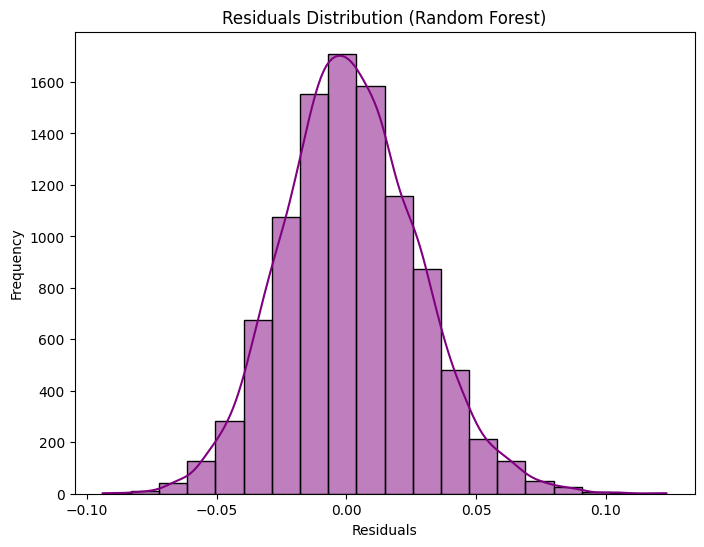

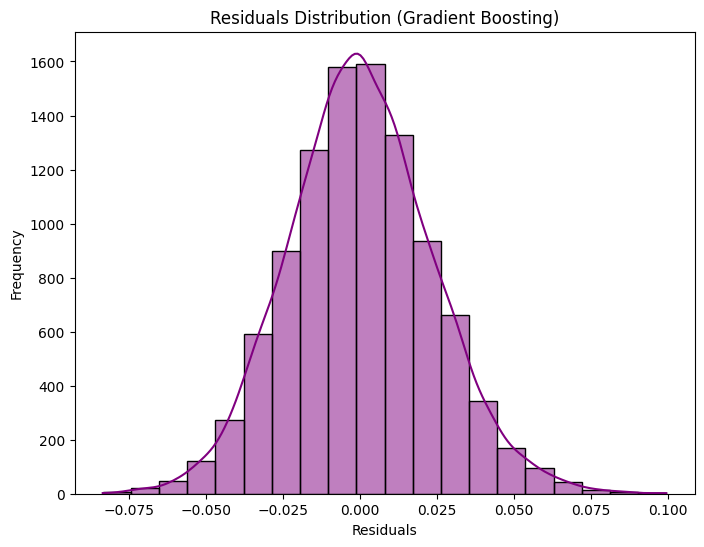

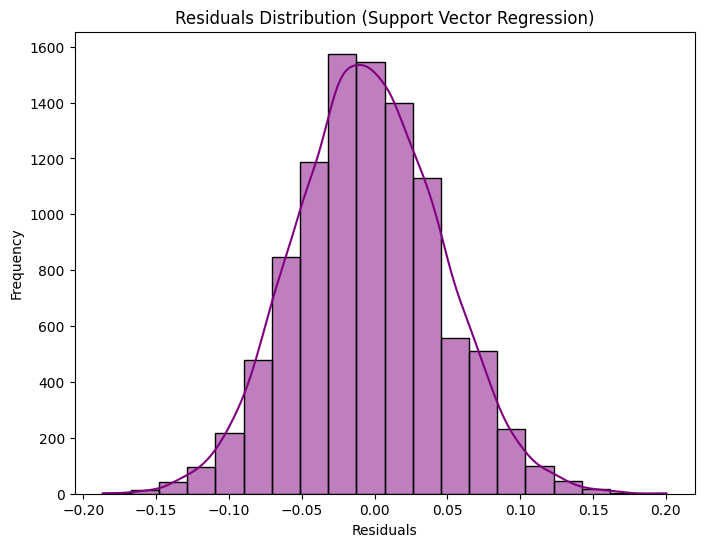

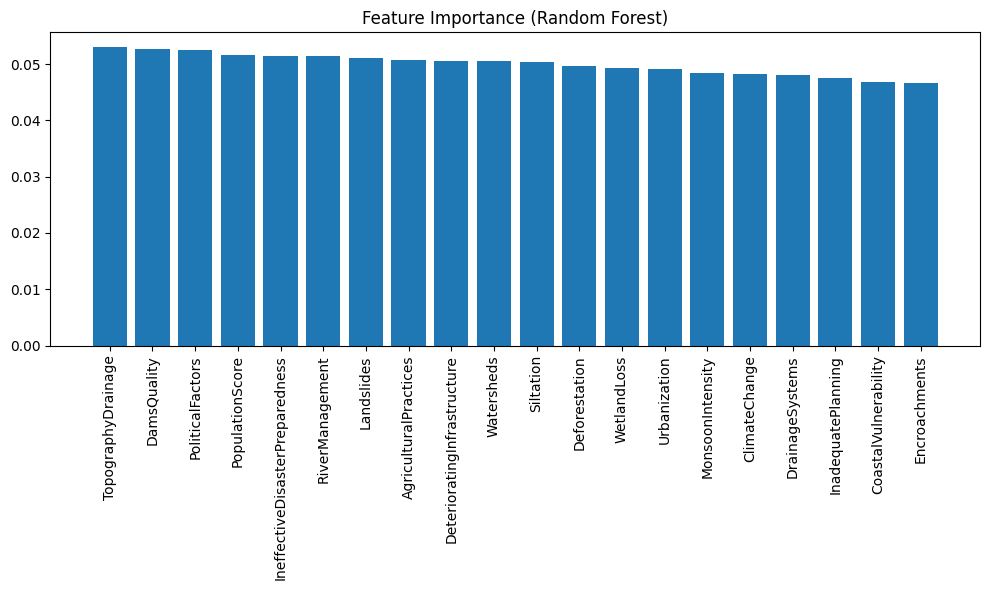

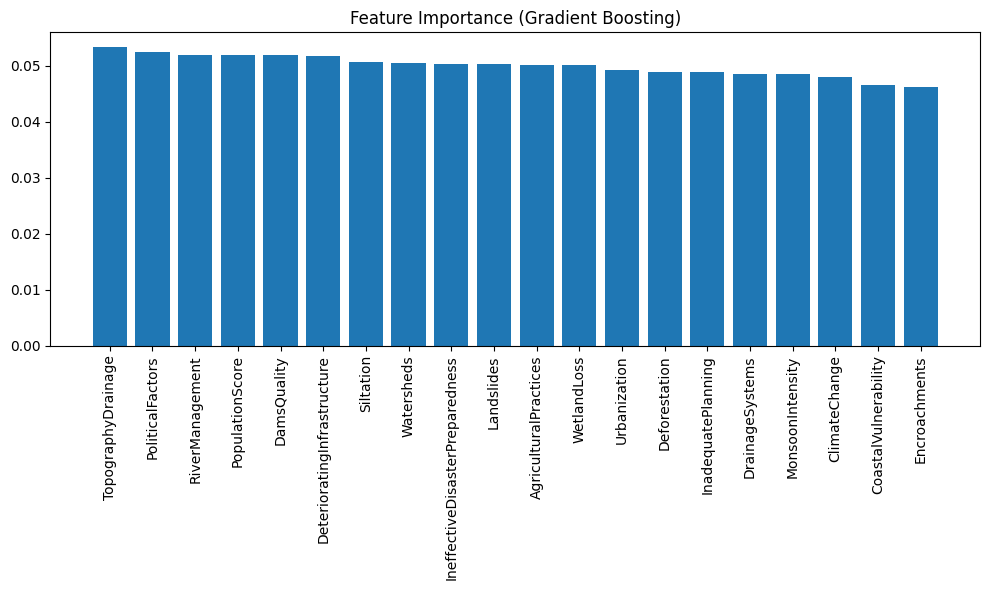

In [5]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=20, kde=True, color='purple')
    plt.title(f'Residuals Distribution ({model_name})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Residuals Plot for each model
plot_residuals(y_test, rf_model.predict(X_test), "Random Forest")
plot_residuals(y_test, gb_model.predict(X_test), "Gradient Boosting")
plot_residuals(y_test, svr_model.predict(X_test), "Support Vector Regression")

# Feature Importance (for RF and GB models)
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance ({model_name})")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot feature importance for RF and GB
plot_feature_importance(rf_model, "Random Forest")
plot_feature_importance(gb_model, "Gradient Boosting")


In [6]:
print("\n--- Model Comparison ---\n")
print(results_df[['Model', 'Training MSE', 'Testing MSE', 'Training R²', 'Testing R²', 'Training MAE', 'Testing MAE', 'Training Time', 'Prediction Time', 'Cross-Validation MSE']])



--- Model Comparison ---

                       Model  Training MSE  Testing MSE  Training R²  \
0              Random Forest      0.000095     0.000673     0.961934   
1          Gradient Boosting      0.000494     0.000551     0.803073   
2  Support Vector Regression      0.002312     0.002479     0.077402   

   Testing R²  Training MAE  Testing MAE  Training Time  Prediction Time  \
0    0.729682      0.007628     0.020485      31.274778         0.359399   
1    0.778957      0.017564     0.018481       7.004421         0.025529   
2    0.004727      0.039195     0.039836       2.975041         0.931671   

   Cross-Validation MSE  
0              0.000686  
1              0.000546  
2              0.002504  
